In [6]:
# Import, read, and split data
import pandas as pd
data = pd.read_csv('data.csv')
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings("ignore")

X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])


### Imports
from sklearn.svm import SVC
### Support Vector Machine
clf = SVC()

# Import GridSearchCV

In [2]:
from sklearn.model_selection import GridSearchCV

# Select the parameters

In [3]:
parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10]}

# Create a scorer

In [4]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
scorer = make_scorer(f1_score)

# Create a GridSearch Object with the parameters, and the scorer. Use this object to fit the data

In [7]:
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X, y)

# Get the best estimator

In [10]:
best_clf = grid_fit.best_estimator_
best_clf

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

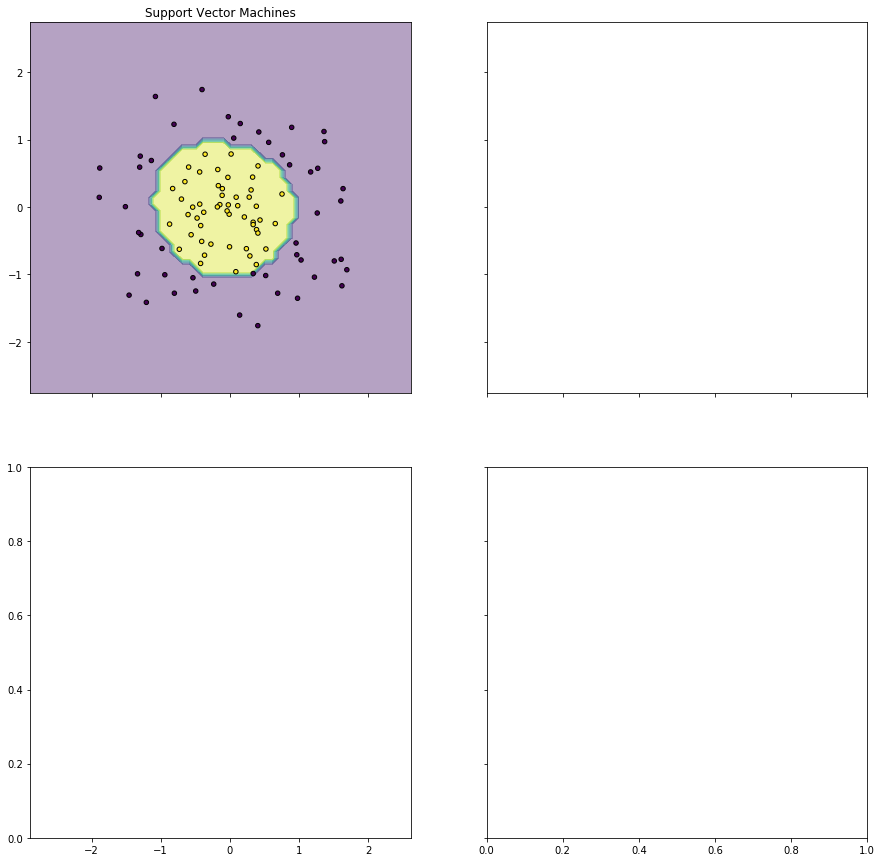

In [16]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(15,15))

for idx, clf, tt in zip(product([0, 1], [0, 1]),[best_clf],['Support Vector Machines']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()